In [2]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
import time
import typing 

import jdatetime

In [3]:
path = "/run/media/mefi/2662B94962B91E8D/Mefi/University/Term 6/Regression Analysis/RA_P1/data/traffic/"
path2 = "/run/media/mefi/2662B94962B91E8D/Mefi/University/Term 6/Regression Analysis/RA_P1/data/"

### total_est_normal chart

In [54]:
import os
import pandas as pd
import plotly.express as px

def drawchart(num):
    base_path = os.path.join(path, "nowruz_02")
    file1 = os.path.join(base_path, f"{num}.csv")
    file2 = os.path.join(base_path, f"{num + 50}.csv")

    # Read both files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Optional: ensure date is string for consistent merging/sorting
    df1['date'] = df1['date'].astype(str)
    df2['date'] = df2['date'].astype(str)

    # Rename value columns to distinguish between the two
    name1 = df1['name'].iloc[0] if 'name' in df1.columns else f"{num}"
    name2 = df2['name'].iloc[0] if 'name' in df2.columns else f"{num + 50}"
    df1 = df1[['date', 'total_est_normal']].rename(columns={'total_est_normal': name1})
    df2 = df2[['date', 'total_est_normal']].rename(columns={'total_est_normal': name2})

    # Merge the two DataFrames on 'date'
    merged = pd.merge(df1, df2, on='date', how='outer').sort_values('date')

    # Melt to long format for Plotly
    df_long = merged.melt(id_vars='date', var_name='name', value_name='total_est_normal')

    # Plot
    fig = px.line(
        df_long,
        x='date',
        y='total_est_normal',
        color='name',
        title='تعداد سواری در روز، نوروز ۱۴۰۲',
        markers=False
    )

    fig.update_layout(
        legend_title='نام محور',
        xaxis_title='تاریخ',
        xaxis_type='category',
        yaxis_title='تعداد',
        template='plotly_white',
        hovermode='x unified',
    )

    fig.show()

In [ ]:
start = 20
end = 40

for idx, f in enumerate(os.listdir(os.path.join(path, "nowruz_03"))):
    if (start <= idx and idx < end):
        try:
            number = int(f.split(".")[0])
            if number % 100 < 50:
                drawchart(int(f.split(".")[0]))
                print(f)
        except Exception as exc:
            print(exc)
    

### Export total_est_normal above 2

In [4]:
path02 = os.path.join(path, "nowruz_02")
path03 = os.path.join(path, "nowruz_03")

df02 = pd.DataFrame()

def summarize(df: pd.DataFrame) -> pd.DataFrame:    
    df = df[(df["total_est_normal"]) >= 3]
    result = df.groupby('code')['date'].agg(list).reset_index()
    return result

for idx, f in enumerate(os.listdir(path02)):
    df_file = pd.read_csv(os.path.join(path02, f))
    df_file["code"] = df_file["code"].astype(str)
    if df02.empty:
        df02 = summarize(df_file)
    else:
        df02 = pd.concat([df02, summarize(df_file)])

df02.rename(columns={"date": "nowruz_02"}, inplace=True)

df03 = pd.DataFrame()

for idx, f in enumerate(os.listdir(path03)):
    df_file = pd.read_csv(os.path.join(path03, f))
    df_file["code"] = df_file["code"].astype(str)
    if df03.empty:
        df03 = summarize(df_file)
    else:
        df03 = pd.concat([df03, summarize(df_file)])

df03.rename(columns={"date": "nowruz_03"}, inplace=True)

df = pd.merge(df02, df03, how='outer', on='code')

df.to_csv(os.path.join(path2, "peaks_data.csv"), sep="|")

### nemidoonam

In [5]:
import os
import pandas as pd
import ast

df = pd.read_csv(os.path.join(path2, "peaks_data.csv"), sep="|")
total_counts_02 = {}

for idx, row in df.iterrows():
    zero2 = row["nowruz_02"]
    if not isinstance(zero2, float):  # assuming float == NaN / missing
        zero2 = ast.literal_eval(zero2)
        for item in zero2:
            key = str(item)
            total_counts_02[key] = total_counts_02.get(key, 0) + 1

df02 = pd.DataFrame.from_dict(total_counts_02, orient='index', columns=['count_02']).reset_index()
df02.rename(columns={'index':'date'},inplace=True)
df02['date'] = df02['date'].astype(str).str[5:].str.replace('01-', '13-')
df02 = df02.sort_values(by='count_02', ascending=False)
df02.head()

,date,count_02
7,13-13,278
23,13-04,265
5,12-29,242
0,12-28,192
8,13-05,189


In [36]:
import os
import pandas as pd
import ast

df = pd.read_csv(os.path.join(path2, "peaks_data.csv"), sep="|")
total_counts_03 = {}

for idx, row in df.iterrows():
    zero2 = row["nowruz_03"]
    if not isinstance(zero2, float):  # assuming float == NaN / missing
        zero2 = ast.literal_eval(zero2)
        for item in zero2:
            key = str(item)
            total_counts_03[key] = total_counts_03.get(key, 0) + 1

df03 = pd.DataFrame.from_dict(total_counts_03, orient='index', columns=['count_03']).reset_index()
df03.rename(columns={'index':'date'},inplace=True)
df03['date'] = df03['date'].astype(str).str[5:].str.replace('01-', '13-')
df03 = df03.sort_values(by='count_03', ascending=False)
df03.head()

,date,count_03
9,13-09,270
17,13-10,250
10,13-13,227
19,13-04,222
27,13-07,221


In [37]:
df = pd.merge(df02, df03, on='date', how='outer')
df.sort_values(by='date')
df.to_dict

<bound method DataFrame.to_dict of      date  count_02  count_03
0   12-10        17         9
1   12-11        17         8
2   12-12        25        13
3   12-13        11        12
4   12-14        11         8
5   12-15        13         5
6   12-16        28         9
7   12-17        14        17
8   12-18        16        24
9   12-19        21        12
10  12-20         5        15
11  12-21         8        17
12  12-22         4        14
13  12-23        21        16
14  12-24        17        48
15  12-25        80        12
16  12-26        62        14
17  12-27        51        29
18  12-28       192       139
19  12-29       242       160
20  13-01       115        65
21  13-02       162       144
22  13-03       172       165
23  13-04       265       222
24  13-05       189       166
25  13-06       124       111
26  13-07        68       221
27  13-08        85       214
28  13-09       118       270
29  13-10       160       250
30  13-11       106       135
31  1

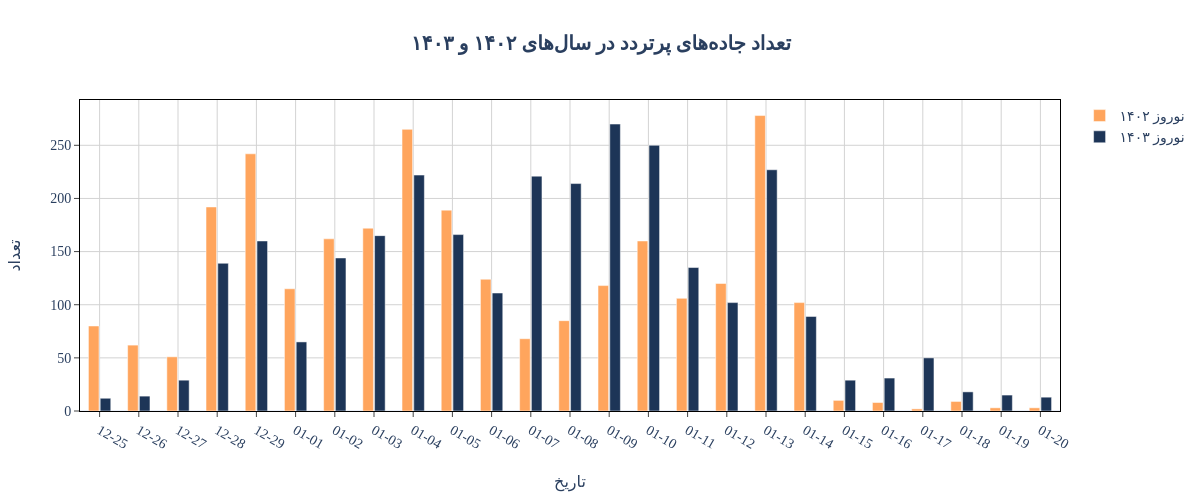

In [48]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Filter and reshape the DataFrame
filtered_df = df[df['date'] >= "12-25"].copy()
filtered_df['date'] = filtered_df['date'].str.replace("13-", "01-")###############################################################

# Melt the dataframe to long format suitable for Plotly
long_df = filtered_df.melt(
    id_vars='date',
    value_vars=['count_02', 'count_03'],
    var_name='سال',
    value_name='تعداد'
)

# Map column names to Persian labels
long_df['سال'] = long_df['سال'].map({
    'count_02': 'تعداد جاده‌های پرتردد سال ۱۴۰۲',
    'count_03': 'تعداد جاده‌های پرتردد سال ۱۴۰۳'
})


custom_order = [f"12-{str(day).zfill(2)}" for day in range(20, 30)] + \
               [f"01-{str(day).zfill(2)}" for day in range(1, 21)]

# رسم نمودار با استفاده از قالب تمپلیت اصلی
fig = go.Figure()

# اضافه کردن بارهای سال ۱۴۰۲ و ۱۴۰۳
fig.add_trace(go.Bar(
    x=long_df[long_df['سال'] == 'تعداد جاده‌های پرتردد سال ۱۴۰۲']['date'],
    y=long_df[long_df['سال'] == 'تعداد جاده‌های پرتردد سال ۱۴۰۲']['تعداد'],
    name='نوروز ۱۴۰۲',
    marker_color='#FFA55D'
))

fig.add_trace(go.Bar(
    x=long_df[long_df['سال'] == 'تعداد جاده‌های پرتردد سال ۱۴۰۳']['date'],
    y=long_df[long_df['سال'] == 'تعداد جاده‌های پرتردد سال ۱۴۰۳']['تعداد'],
    name='نوروز ۱۴۰۳',
    marker_color='#1d3557'
))

# تنظیمات ظاهری مشابه تمپلیت مرجع
fig.update_layout(
    xaxis=dict(
        title='تاریخ',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        tickangle=30,###############################################################
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray',
        type='category',
        categoryorder='array',###############################################################
        categoryarray=custom_order###############################################################
    ),
    yaxis=dict(
        title='تعداد',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray',
    ),
    font=dict(
        family='Yas',
        size=14,
    ),
    title='<b>تعداد جاده‌های پرتردد در سال‌های ۱۴۰۲ و ۱۴۰۳</b>',
    title_x=0.5,
    barmode='group',
    template='plotly_white',
    bargap=0.4,
    bargroupgap=0.1,
    height=500,
    legend_title_text='',
    hovermode='x unified'
)

fig.show()


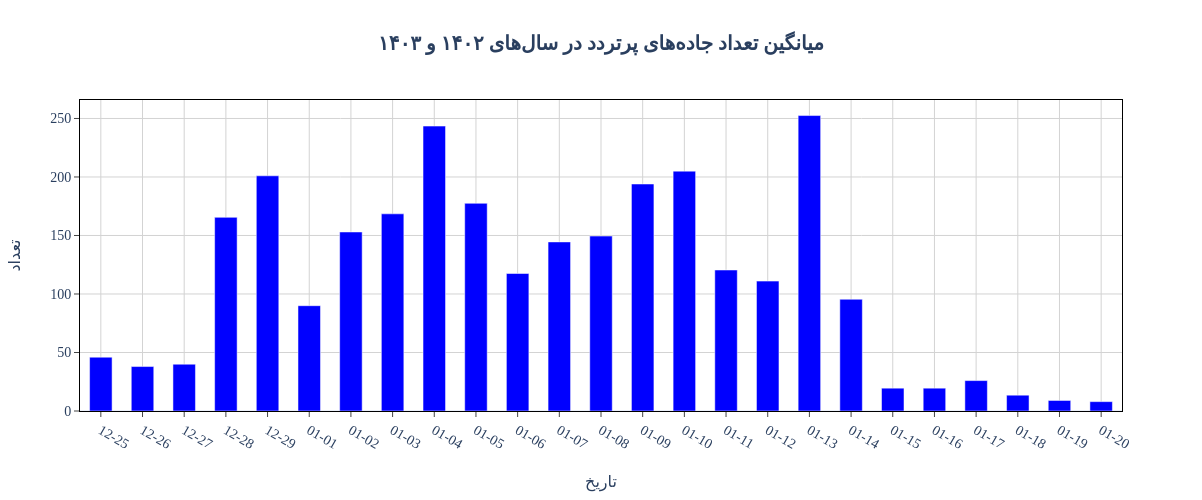

In [70]:
import plotly.graph_objects as go
import pandas as pd

# Filter the DataFrame
filtered_df = df[df['date'] >= "12-25"].copy()
filtered_df['date'] = filtered_df['date'].str.replace("13-", "01-")  # unify date format

# Compute the average of the two columns
filtered_df['average_count'] = filtered_df[['count_02', 'count_03']].mean(axis=1)

# Create a new DataFrame for plotting
avg_df = filtered_df[['date', 'average_count']].copy()
avg_df.rename(columns={'average_count': 'تعداد'}, inplace=True)

# Custom date order
custom_order = [f"12-{str(day).zfill(2)}" for day in range(20, 30)] + \
               [f"01-{str(day).zfill(2)}" for day in range(1, 21)]

# Draw the chart using go.Figure for full control
fig = go.Figure()

fig.add_trace(go.Bar(
    x=avg_df['date'],
    y=avg_df['تعداد'],
    name='میانگین نوروز ۱۴۰۲ و ۱۴۰۳',
    marker_color='blue'
))

# Layout to match the main template
fig.update_layout(
    xaxis=dict(
        title='تاریخ',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        tickangle=30,
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray',
        type='category',
        categoryorder='array',
        categoryarray=custom_order
    ),
    yaxis=dict(
        title='تعداد',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray',
    ),
    font=dict(
        family='Yas',
        size=14,
    ),
    title='<b>میانگین تعداد جاده‌های پرتردد در سال‌های ۱۴۰۲ و ۱۴۰۳</b>',
    title_x=0.5,
    barmode='group',
    template='plotly_white',
    bargap=0.4,
    bargroupgap=0.1,
    height=500,
    legend_title_text='',
    hovermode='x unified'
)

fig.show()


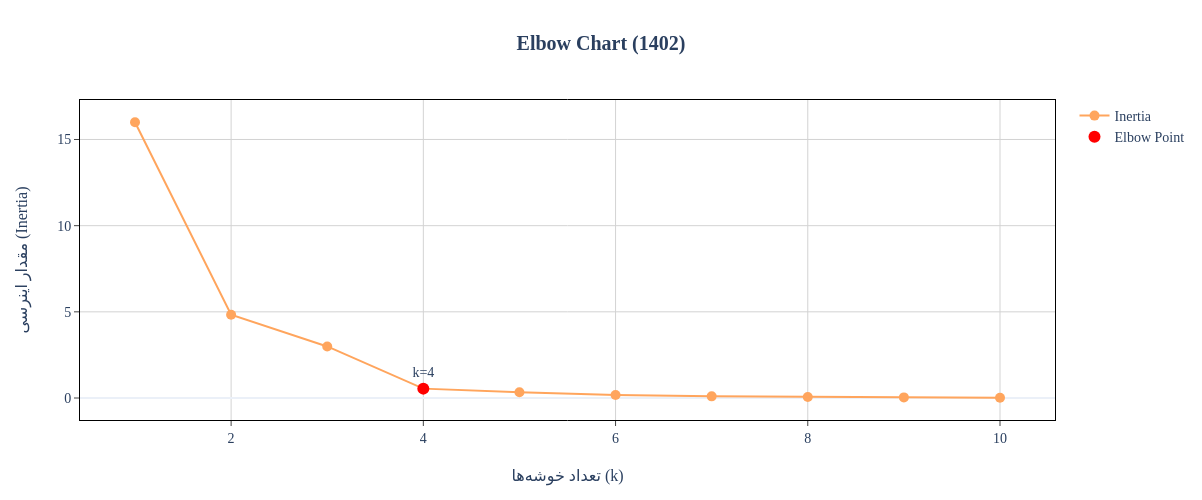

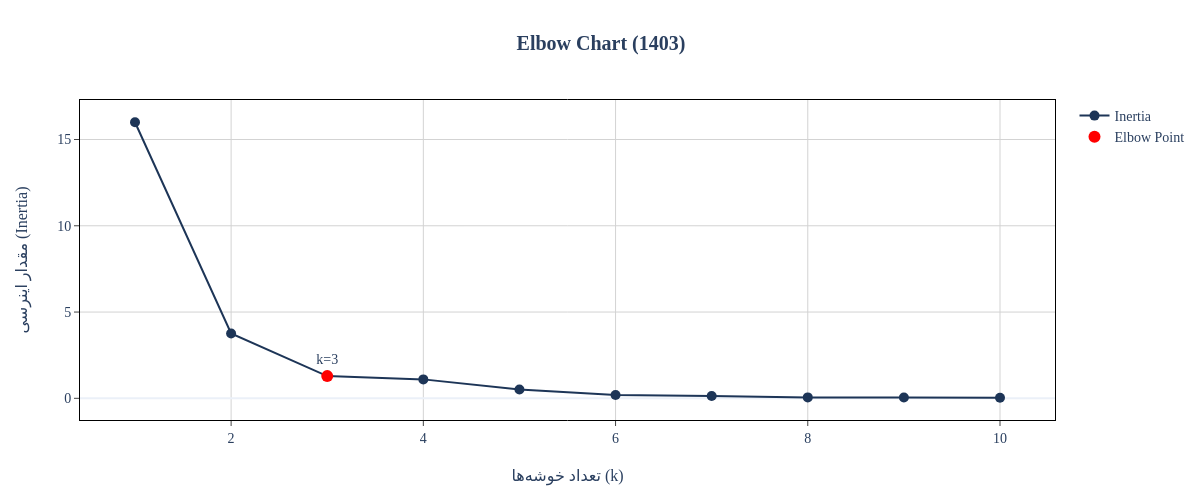

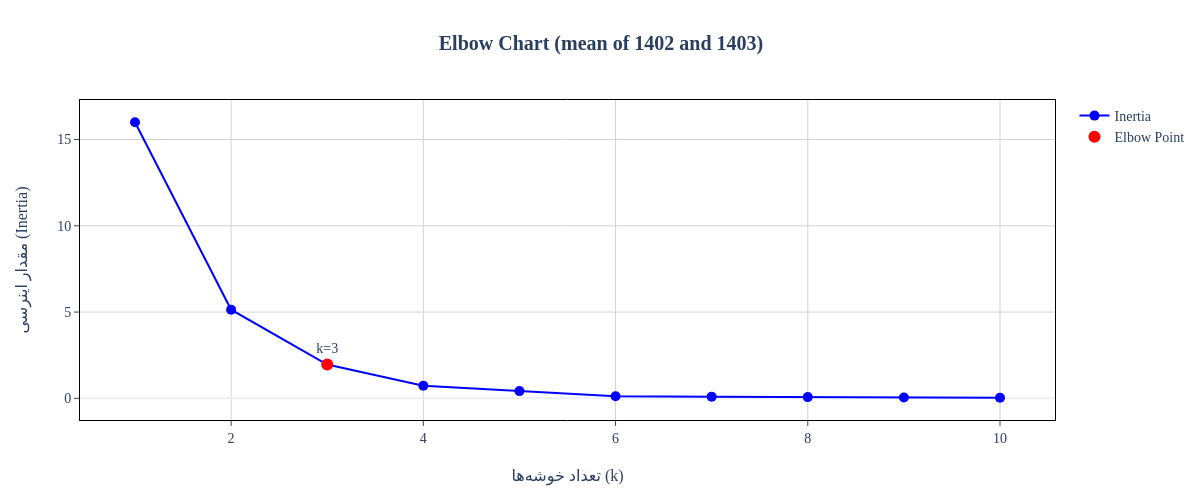

In [62]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Filter data
filtered_df = df[(df['date'] >= "12-28") & (df['date'] <= "13-14")].copy()
filtered_df['mean'] = filtered_df[['count_02', 'count_03']].mean(axis=1)

# Set desired k values
k_02 = 4
k_03 = 3
k_mean = 3

# Elbow chart function with updated formatting
def draw_elbow(data, feature, title, resulting_k, color):
    X = data[[feature]].values
    X_scaled = StandardScaler().fit_transform(X)
    
    inertias = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)

    fig = go.Figure()

    # Add inertia line
    fig.add_trace(go.Scatter(
        x=list(K_range),
        y=inertias,
        mode='lines+markers',
        marker=dict(size=10, color=color),
        line=dict(width=2),
        name='Inertia'
    ))

    # Add elbow point marker
    fig.add_trace(go.Scatter(
        x=[resulting_k],
        y=[inertias[resulting_k - 1]],
        mode='markers+text',
        text=[f"k={resulting_k}"],
        textposition='top center',
        marker=dict(size=12, color='red'),
        name='Elbow Point'
    ))

    # Layout styling matching template
    fig.update_layout(
        title=f'<b>{title}</b>',
        title_x=0.5,
        xaxis=dict(
            title='تعداد خوشه‌ها (k)',
            title_font=dict(size=16),
            tickfont=dict(size=14),
            title_standoff=25,
            mirror=True,
            ticks='outside',
            showline=True,
            linecolor='black',
            gridcolor='lightgray'
        ),
        yaxis=dict(
            title='مقدار اینرسی (Inertia)',
            title_font=dict(size=16),
            tickfont=dict(size=14),
            title_standoff=25,
            mirror=True,
            ticks='outside',
            showline=True,
            linecolor='black',
            gridcolor='lightgray'
        ),
        font=dict(
            family='Yas',
            size=14
        ),
        template='plotly_white',
        height=500,
        hovermode='x unified'
    )

    fig.show()

# Draw all elbow charts
draw_elbow(filtered_df, 'count_02', 'Elbow Chart (1402)', k_02, "#FFA55D")
draw_elbow(filtered_df, 'count_03', 'Elbow Chart (1403)', k_03, "#1d3557")
draw_elbow(filtered_df, 'mean', 'Elbow Chart (mean of 1402 and 1403)', k_mean, "blue")


cluster 1: ['12-29', '01-04', '01-13']
cluster 2: ['12-28', '01-02', '01-03', '01-05', '01-10']
cluster 3: ['01-01', '01-06', '01-09', '01-11', '01-12', '01-14']
cluster 4: ['01-07', '01-08']


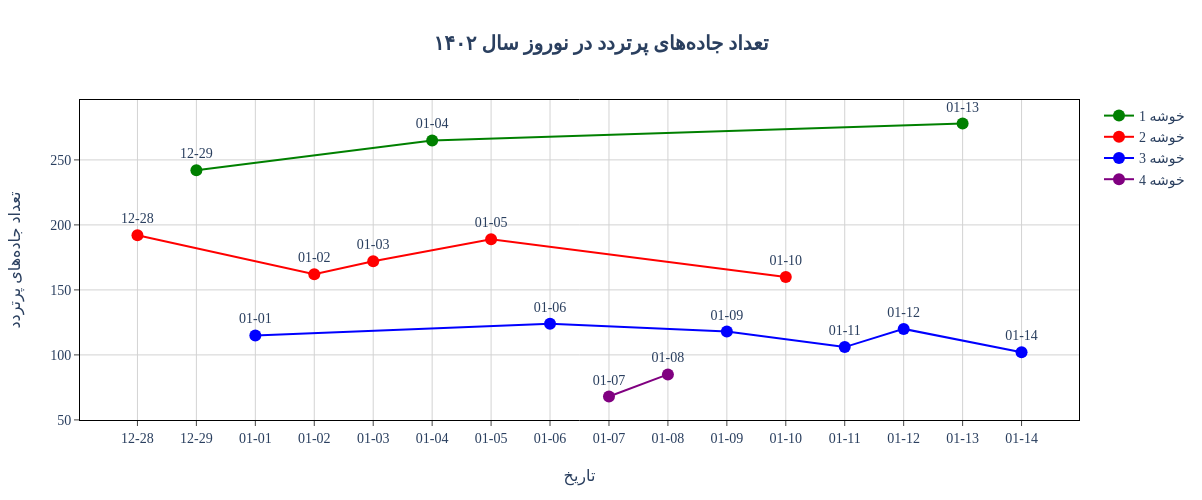

cluster 1: ['01-04', '01-07', '01-08', '01-09', '01-10', '01-13']
cluster 2: ['12-28', '12-29', '01-02', '01-03', '01-05', '01-11']
cluster 3: ['01-01', '01-06', '01-12', '01-14']


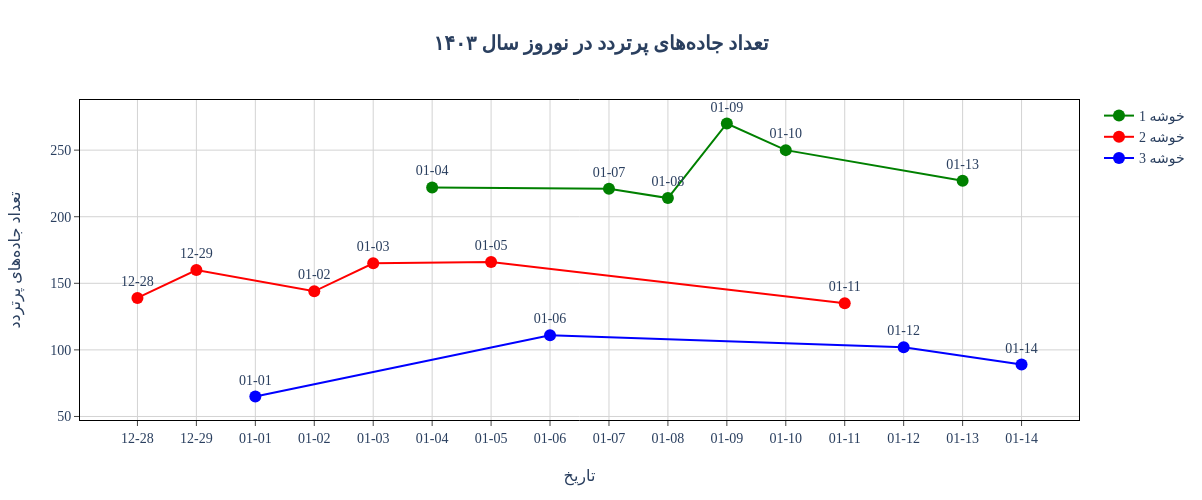

cluster 1: ['12-29', '01-04', '01-09', '01-10', '01-13']
cluster 2: ['12-28', '01-02', '01-03', '01-05', '01-07', '01-08']
cluster 3: ['01-01', '01-06', '01-11', '01-12', '01-14']


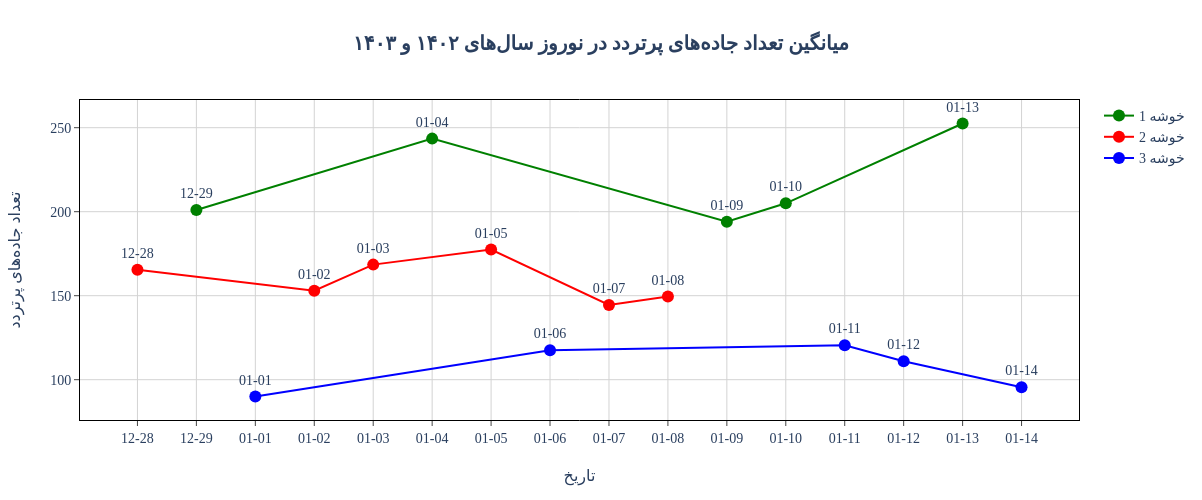

In [85]:
#### import pandas as pd
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ensure date is string
df['date'] = df['date'].astype(str).copy()

# Filter and prepare data
filtered_df = df[(df['date'] >= "12-28") & (df['date'] <= "13-14")].copy()
filtered_df['date'] = filtered_df['date'].astype(str).str.replace('13-', '01-', regex=False)
filtered_df['mean'] = filtered_df[['count_02', 'count_03']].mean(axis=1)

# Number of clusters
k_02 = 4
k_03 = 3
k_mean = 3

# Function to cluster and plot
def cluster_and_plot(data, column, k, title):
    X = data[[column]].values
    X_scaled = StandardScaler().fit_transform(X)
    kmeans = KMeans(n_clusters=k, random_state=0)
    data['cluster'] = kmeans.fit_predict(X_scaled)

    fig = go.Figure()
    colors = ['green', 'red', 'blue', 'purple', 'orange']

    cluster_order = (
        data.groupby('cluster')[column]
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )    
    new_cluster_labels = {old: new for new, old in enumerate(cluster_order['cluster'])}
    data['cluster'] = data['cluster'].map(new_cluster_labels)
    

    for cluster in sorted(data['cluster'].unique()):
        cluster_data = data[data['cluster'] == cluster]

        date_list = cluster_data['date'].tolist()
        print(f"cluster {cluster + 1}: {date_list}")
        
        fig.add_trace(go.Scatter(
            x=cluster_data['date'],
            y=cluster_data[column],
            mode='markers+lines+text',
            text=cluster_data['date'],
            textposition='top center',
            marker=dict(size=12, color=colors[cluster % len(colors)]),
            name=f'خوشه {cluster + 1}'
        ))

    fig.update_layout(
        title=f'<b>{title}</b>',
        title_x=0.5,
        height=500,
        xaxis=dict(
            title='تاریخ',
            title_font=dict(size=16),
            tickfont=dict(size=14),
            title_standoff=25,
            mirror=True,
            ticks='outside',
            showline=True,
            linecolor='black',
            gridcolor='lightgray',
            type='category',
            categoryorder='array',###############################################################
            categoryarray=custom_order###############################################################

            
        ),
        yaxis=dict(
            title='تعداد جاده‌های پرتردد',
            title_font=dict(size=16),
            tickfont=dict(size=14),
            title_standoff=25,
            mirror=True,
            ticks='outside',
            showline=True,
            linecolor='black',
            gridcolor='lightgray'
        ),
        font=dict(family='Yas', size=14),
        template='plotly_white',
        hovermode='x unified'
    )

    fig.show()

# Plot each clustering chart
cluster_and_plot(filtered_df.copy(), 'count_02', k_02, 'تعداد جاده‌های پرتردد در نوروز سال ۱۴۰۲')
cluster_and_plot(filtered_df.copy(), 'count_03', k_03, 'تعداد جاده‌های پرتردد در نوروز سال ۱۴۰۳')
cluster_and_plot(filtered_df.copy(), 'mean', k_mean, 'میانگین تعداد جاده‌های پرتردد در نوروز سال‌های ۱۴۰۲ و ۱۴۰۳')
